In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import yfinance as yf
from datetime import date
stk_dataset=yf.download("RELIANCE.NS",start=date(2022,4,1),end=date(2023,4,1))
stk_dataset

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2022-04-01,1217.387817,1221.650792,1201.871728,1208.288985,7922880
2022-04-04,1220.986206,1226.165915,1210.878978,1217.204574,7929162
2022-04-05,1203.728149,1223.828150,1201.275847,1215.210538,13149870
2022-04-06,1200.519653,1207.601576,1185.874465,1185.874465,12257215
2022-04-07,1179.342407,1194.537683,1176.660831,1189.541297,15496499
...,...,...,...,...,...
2023-03-24,1013.243347,1034.719547,1010.806034,1032.535124,12375945
2023-03-27,1028.994019,1036.558970,1011.817755,1019.773599,14054323


In [4]:
stk_dataset.describe()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,1155.428101,1168.090842,1144.173888,1156.357741,1.421068e+07
std,60.379135,60.937339,59.053048,59.395006,8.048908e+06
min,1012.300598,1020.923276,1002.528234,1018.623903,3.370033e+06
25%,1109.485229,1118.309079,1097.883375,1110.438055,9.434053e+06
50%,1163.528320,1177.074029,1151.527923,1164.284581,1.257582e+07
75%,1198.711060,1208.884893,1184.684910,1196.825637,1.706322e+07
max,1292.562256,1309.201494,1277.091875,1309.201494,8.199715e+07


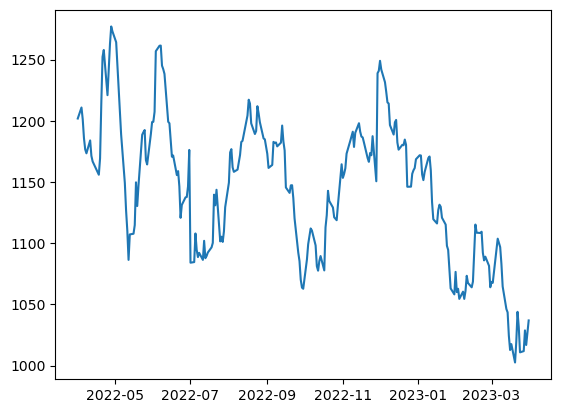

In [5]:
plt.plot(stk_dataset["Low"])

In [6]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(stk_dataset["Low"])

P_value < 0.0.5 reject null and accept alternate hypothesis     H0: Datas are non-stationary
P_value > 0.0.5 accept null and reject alternate hypothesis     H1 : Datas are stationary

In [7]:
Statistic=result[0]
p_value=result[1]
critical_values=result[4]
print("p-value<=0.05-->Accept Alternate Hypothesis")
print("p-value>0.05-->Accept Null Hypothesis")
if Statistic < critical_values["1%"] or Statistic < critical_values["5%"] or Statistic < critical_values["10%"] or p_value < 0.05:
    print(" Rejecting null and accepting alternate the data are stationary")
else:
    print(" accepting null and rejecting alternate the data are non-stationary")
 
 

p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
 accepting null and rejecting alternate the data are non-stationary


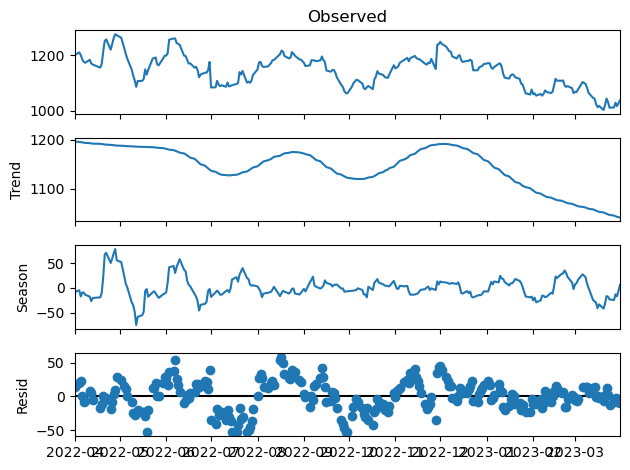

In [8]:
from statsmodels.tsa.seasonal import STL

decomposition = STL(stk_dataset["Low"], period=30).fit()  # Set `period` based on known seasonality
decomposition.plot()
plt.show()

# It is Season and trend non-stationarity

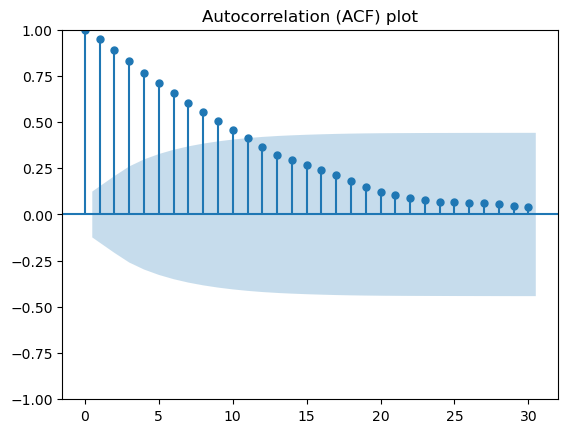

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stk_dataset["Low"],lags=30)
plt.title("Autocorrelation (ACF) plot")
plt.show()

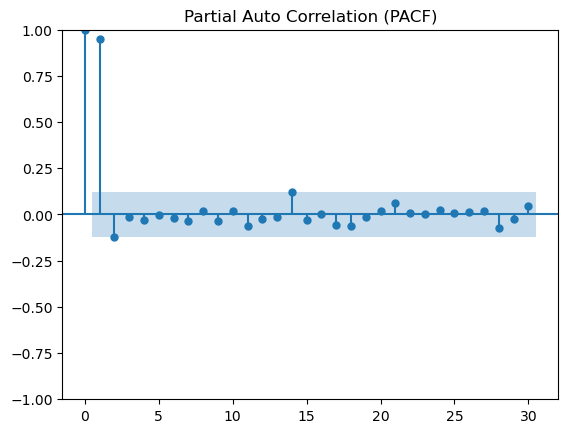

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(stk_dataset["Low"],lags=30)
plt.title("Partial Auto Correlation (PACF)")
plt.show()

ACF plot shows that datas are non statinary as it is gradually declining
In PACF the point in blue band are insignificant

In [34]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
stk_dataset["Low"]=stk_dataset["Low"].dropna().values.ravel()
stan=mms.fit_transform(stk_dataset["Low"])
print("Len",stk_dataset.shape)

Len (249, 5)


In [35]:
data_size=round(len(stan)*0.80)
print(data_size)
train=stan[:data_size]
test=stan[data_size:]
print(train)
print(test)
print(type(train))
print(type(stk_dataset))

199
[[0.72603748]
 [0.75884317]
 [0.7238672 ]
 [0.66777316]
 [0.63421579]
 [0.62252949]
 [0.66092752]
 [0.61484996]
 [0.59832195]
 [0.55875517]
 [0.60758771]
 [0.77128034]
 [0.90968086]
 [0.9300486 ]
 [0.79557169]
 [0.86911234]
 [0.94816255]
 [1.        ]
 [0.98530888]
 [0.95317094]
 [0.81669059]
 [0.74273269]
 [0.67854045]
 [0.53404677]
 [0.45224205]
 [0.3920571 ]
 [0.30532742]
 [0.38103841]
 [0.38320854]
 [0.40883535]
 [0.53613394]
 [0.46568141]
 [0.52569943]
 [0.67762263]
 [0.68546916]
 [0.69181289]
 [0.60249548]
 [0.58930702]
 [0.67962608]
 [0.71551966]
 [0.71635459]
 [0.74607142]
 [0.92637547]
 [0.9427367 ]
 [0.9431544 ]
 [0.8834703 ]
 [0.87295216]
 [0.85876171]
 [0.71652126]
 [0.71176335]
 [0.66326474]
 [0.61251269]
 [0.61601883]
 [0.55758652]
 [0.56960675]
 [0.52402943]
 [0.43053873]
 [0.46893696]
 [0.49155831]
 [0.49247676]
 [0.52403008]
 [0.63254647]
 [0.29698031]
 [0.29881593]
 [0.38395997]
 [0.33537827]
 [0.3136749 ]
 [0.32627941]
 [0.30532751]
 [0.36208963]
 [0.31033618]
 [

In [36]:
from statsmodels.tsa.ar_model import AutoReg
import numpy as np
lags=[1,2,3,4]
trends=['n','c','t','ct']
for i in lags:
    for t in trends:
        armodel=AutoReg(train,lags=i,trend=t)
        armodelcreate=armodel.fit()
        pred=armodelcreate.predict(len(train),len(stan)-1)
        from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
        print("Lag={},Trend={}".format(i,t))
        mse=mean_squared_error(test,pred,squared=False)
        safe_test = test.copy()
        safe_test[safe_test == 0] = 1e-10 
        mape=mean_absolute_percentage_error(safe_test,pred)
        print("mse={},mape={}".format(mse,mape))
        print("************")
        


Lag=1,Trend=n
mse=0.16766001479848536,mape=64822010.997574545
************
Lag=1,Trend=c
mse=0.3344571318384854,mape=112707814.97025321
************
Lag=1,Trend=t
mse=0.3970755041949757,mape=134697442.28453198
************
Lag=1,Trend=ct
mse=0.3019225527939648,mape=103918573.34427276
************
Lag=2,Trend=n
mse=0.1593705941530932,mape=61779086.43542823
************
Lag=2,Trend=c
mse=0.34142610830617665,mape=113586746.18323174
************
Lag=2,Trend=t
mse=0.4340962419386335,mape=144797209.50687978
************
Lag=2,Trend=ct
mse=0.3150094366173771,mape=106639594.36711797
************
Lag=3,Trend=n
mse=0.16002799899377246,mape=61927341.01447776
************
Lag=3,Trend=c
mse=0.34695672896971774,mape=114441023.40775858
************
Lag=3,Trend=t
mse=0.4396380678132231,mape=146286063.20286453
************
Lag=3,Trend=ct
mse=0.31527172015955107,mape=106228992.34825386
************
Lag=4,Trend=n
mse=0.16784002676168916,mape=64535951.47443041
************
Lag=4,Trend=c
mse=0.349424042849

C:\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.wa